In [1]:
import numpy as np
import chilife as xl
np.random.seed(0)

C:\Program Files\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Program Files\Python310\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
# Fetch maltodextrin binding protein structure from the PDB
protein = xl.fetch('1omp')

# Create spin labels using the off-rotamer sampling method
SL1 = xl.SpinLabel('R1M', 238, protein, sample=10000)
SL2 = xl.SpinLabel('R1M', 275, protein, sample=10000)

# Save spin labels and protein structure
xl.save('1omp_S238R1_L275R1.pdb', SL1, SL2, protein)

# Create spin labels using the rotamer library method 
SL1rl = xl.SpinLabel('R1M', 238, protein)
SL2rl = xl.SpinLabel('R1M', 275, protein)

# Create spin labels using the accessible volume method 
SL1av = xl.SpinLabel('R1M', 238, protein, sample=10000, dihedral_sigmas=np.inf)
SL2av = xl.SpinLabel('R1M', 275, protein, sample=10000, dihedral_sigmas=np.inf)

# Predict distance distributions over an experimental axis
r, Pexp, Plb, Pub = np.loadtxt('Exp_Data.txt')
P = xl.distance_distribution(SL1, SL2, r=r)
Prl = xl.distance_distribution (SL1rl, SL2rl, r=r)
Pav = xl.distance_distribution (SL1av, SL2av, r=r)

  if atom_list == []:



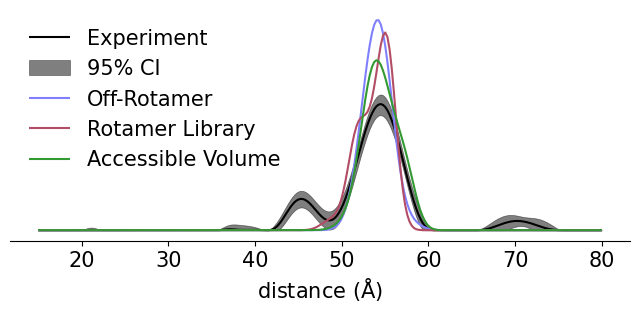

In [3]:
import matplotlib.pyplot as plt
plt.style.use('chiLife')
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(r, Pexp, label='Experiment', color='k')
ax.fill_between(r, Plb, Pub, alpha=0.5, label="95% CI", color='k')

ax.plot(r, P, label='Off-Rotamer', color='C0')
ax.plot(r, Prl, label='Rotamer Library', color='C1')
ax.plot(r, Pav, label='Accessible Volume', color='C3')


ax.set_yticks([])
ax.set_xlabel(r'distance ($\rm\AA$)')
ax.legend(frameon=False)
for spine in ['left', 'top', 'right']:
    ax.spines[spine].set_visible(False)

plt.show()
fig.savefig('MBP S238R1 L275R1_Pr.png', bbox_inches='tight', dpi=1000)
